# Exercise I - Gaining Insights from Dataset (Week 3 & 4) 

This exercise focuses on drawing insights from dataset (Data Science Salaries 2023) based on content of Week 3 - Basic Statistics and Week 4 Probabilities & Distribution. 

- Data Cleaning
- Summary Statistics (Central Tendency, Distributions, etc.)
- Data Visualisations
- Futher Exploration

### Dataset: Prep (Data Cleaning) & Overview

In [1]:
import pandas as pd
import numpy as np
# for data visualisation, plotting
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn as sns
# for colormap
from matplotlib import colormaps 

Dataset used for this exercise is from [kaggle - Jobs and Salaries in Data Science](https://www.kaggle.com/datasets/hummaamqaasim/jobs-in-data) created by HUMMAAM QAASIM.

In [2]:
# https://www.kaggle.com/datasets/hummaamqaasim/jobs-in-data
df = pd.read_csv("./data/jobs_in_data.csv")

In [3]:
# re-sort the df based on experience level
experience_levels = ["Entry-level", "Mid-level", "Senior", "Executive"]	
df['experience_level'] = pd.Categorical(df['experience_level'], categories=experience_levels, ordered=True)
df = df.sort_values('experience_level')

In [4]:
# only keep rows with 'work_year' = 2023 and 'employment_type' = full-time as I'm only interested in full-time salaries last year (2023)
# selectively remove some columns for a clean df

df = df[df['work_year'] == 2023]
df = df[df['employment_type'] == 'Full-time']
df.drop(['salary_currency', 'salary', 'employment_type'], axis=1, inplace=True) # axis number (0 for rows and 1 for columns)
df

,work_year,job_title,job_category,salary_in_usd,employee_residence,experience_level,work_setting,company_location,company_size
6857,2023,Data Scientist,Data Science and Research,19910,Brazil,Entry-level,Remote,Brazil,L
814,2023,Data Integration Specialist,Data Management and Strategy,240000,United States,Entry-level,Remote,United States,M
815,2023,Data Integration Specialist,Data Management and Strategy,100000,United States,Entry-level,Remote,United States,M
6802,2023,Data Analyst,Data Analysis,48000,United States,Entry-level,In-person,United States,M
6801,2023,Data Analyst,Data Analysis,55000,United States,Entry-level,In-person,United States,M
...,...,...,...,...,...,...,...,...,...
6110,2023,Data Architect,Data Architecture and Modeling,155000,United States,Executive,In-person,United States,M
6109,2023,Data Architect,Data Architecture and Modeling,180000,United States,Executive,In-person,United States,M
2121,2023,Analytics Engineer,Leadership and Management,200000,United States,Executive,In-person,United States,M
4977,2023,Data Scientist,Data Science and Research,250000,United States,Executive,Remote,United States,M


In [5]:
# just in case there are some errors in the 'salary_in_usd' column - convert all to numeric type
# errors='coerce' - where the conversion cannot be performed, replacing them with NaN
# reference code found in: https://www.geeksforgeeks.org/python-pandas-to_numeric-method/
df["salary_in_usd"] = pd.to_numeric(df["salary_in_usd"], errors='coerce')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7437 entries, 6857 to 2420
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   work_year           7437 non-null   int64   
 1   job_title           7437 non-null   object  
 2   job_category        7437 non-null   object  
 3   salary_in_usd       7437 non-null   int64   
 4   employee_residence  7437 non-null   object  
 5   experience_level    7437 non-null   category
 6   work_setting        7437 non-null   object  
 7   company_location    7437 non-null   object  
 8   company_size        7437 non-null   object  
dtypes: category(1), int64(2), object(6)
memory usage: 530.4+ KB


In [7]:
df.shape

(7437, 9)

In [8]:
df.describe()

,work_year,salary_in_usd
count,7437.0,7437.000000
mean,2023.0,155289.176012
std,0.0,62895.647156
min,2023.0,16000.000000
25%,2023.0,110200.000000
50%,2023.0,147100.000000
75%,2023.0,192000.000000
max,2023.0,430640.000000


In [9]:
# any missing values?
# reference code found in: https://note.nkmk.me/en/python-pandas-nan-judge-count/
df.isnull().sum()

work_year             0
job_title             0
job_category          0
salary_in_usd         0
employee_residence    0
experience_level      0
work_setting          0
company_location      0
company_size          0
dtype: int64

#### Job Category & Job Title

Findings:

- There are 109 different job titles across 10 varied job categories recorded in this dataset.
- Job titles with the highest number of entries recorded in this dataset are: 
  - Data Engineer (1662)
  - Data Scientist (1536)
  - Data Analyst (1090)
- Similarly, the job categories with the most entries are:
  - Data Science and Research (2410)
  - Data Engineering (1697)
  - Machine Learning and AI (1189)
- As I'm uncertain about the data collection methods used to create this dataset, it would be imprudent to hastily conclude that 'Data Engineer' is the most popular job position in data science or that 'Data Science and Research' is the most popular sub-field.
- Nevertheless, the substantial number of entries for these positions and categories could provide valuable insights into the salary ranges associated with them - which is the main point of this exercise.

In [10]:
# check job_title & job_category
print(f"There are {df['job_title'].nunique()} different job titles recorded in this dataset")
print(f"There are {df['job_category'].nunique()} different job categories recorded in this dataset")

There are 109 different job titles recorded in this dataset
There are 10 different job categories recorded in this dataset


In [11]:
df["job_title"].unique()

array(['Data Scientist', 'Data Integration Specialist', 'Data Analyst',
       'AI Developer', 'Computer Vision Engineer', 'Research Scientist',
       'Data Engineer', 'Research Engineer', 'Big Data Engineer',
       'BI Developer', 'Applied Machine Learning Scientist',
       'Business Data Analyst', 'AI Engineer', 'AI Programmer',
       'Analytics Engineer', 'Research Analyst', 'ML Engineer',
       'Deep Learning Engineer', 'BI Data Analyst',
       'Data Management Analyst', 'Data Science Engineer',
       'Data Quality Engineer', 'Applied Data Scientist',
       'AI Research Engineer', 'Financial Data Analyst',
       'Machine Learning Engineer', 'Applied Scientist',
       'Compliance Data Analyst', 'BI Data Engineer',
       'Business Intelligence Analyst', 'Cloud Data Engineer',
       'Finance Data Analyst', 'AI Scientist',
       'Business Intelligence Data Analyst', 'MLOps Engineer',
       'Data Quality Analyst', 'Machine Learning Specialist',
       'Data Science Consult

In [12]:
# how many entry recorded for each job title?
df["job_title"].value_counts()

job_title
Data Engineer                        1662
Data Scientist                       1536
Data Analyst                         1090
Machine Learning Engineer             862
Applied Scientist                     254
                                     ... 
Lead Data Analyst                       1
AWS Data Architect                      1
Computer Vision Software Engineer       1
Deep Learning Researcher                1
Machine Learning Manager                1
Name: count, Length: 109, dtype: int64

In [13]:
df["job_category"].unique()

array(['Data Science and Research', 'Data Management and Strategy',
       'Data Analysis', 'Machine Learning and AI', 'Data Engineering',
       'BI and Visualization', 'Leadership and Management',
       'Data Quality and Operations', 'Data Architecture and Modeling',
       'Cloud and Database'], dtype=object)

In [14]:
# how many entry recorded for each job category?
df["job_category"].value_counts()

job_category
Data Science and Research         2410
Data Engineering                  1697
Machine Learning and AI           1189
Data Analysis                     1120
Leadership and Management          414
BI and Visualization               305
Data Architecture and Modeling     208
Data Management and Strategy        48
Data Quality and Operations         43
Cloud and Database                   3
Name: count, dtype: int64

#### Experience Level

Findings:
- There are 4 different experience levels recorded in this dataset: Entry-level, Mid-level, Senior, Executive
- Senior level positons have the highest number of entries(5485)

In [15]:
# check experience levels
print(f"There are {df['experience_level'].nunique()} different experience levels recorded in this dataset")

There are 4 different experience levels recorded in this dataset


In [16]:
df["experience_level"].unique()

['Entry-level', 'Mid-level', 'Senior', 'Executive']
Categories (4, object): ['Entry-level' < 'Mid-level' < 'Senior' < 'Executive']

In [17]:
# how many entry recorded for each experience level?
df["experience_level"].value_counts()

experience_level
Senior         5485
Mid-level      1405
Entry-level     320
Executive       227
Name: count, dtype: int64

#### Locations

Findings: 
- There are 55 different employee residences and 47 different company locations recorded in this dataset (apparently some employees are working remotely - hybrid mode!)
- A significant majority of the recorded jobs/positions are based in the U.S. - so this dataset may not be suitable for summarising data science-related job salary information on a global scale - def cannot be used on UK job market.

In [18]:
# check employee locations
print(f"There are {df['employee_residence'].nunique()} different employee residences recorded in this dataset")

There are 55 different employee residences recorded in this dataset


In [19]:
df["employee_residence"].unique()

array(['Brazil', 'United States', 'Germany', 'India', 'Uzbekistan',
       'United Kingdom', 'Sweden', 'Kuwait', 'Switzerland', 'Spain',
       'Portugal', 'Netherlands', 'Argentina', 'Ukraine',
       'Bosnia and Herzegovina', 'Greece', 'France', 'South Korea',
       'Canada', 'Kenya', 'Italy', 'Turkey', 'Croatia', 'Nigeria',
       'Uganda', 'Ecuador', 'Australia', 'Poland', 'Saudi Arabia',
       'Tunisia', 'Peru', 'Andorra', 'Colombia', 'Estonia', 'Latvia',
       'Armenia', 'Qatar', 'Mexico', 'Romania', 'Finland', 'Ireland',
       'Egypt', 'Austria', 'Singapore', 'Slovenia', 'Lithuania', 'Cyprus',
       'Central African Republic', 'South Africa', 'Russia', 'Thailand',
       'Philippines', 'Georgia', 'Moldova', 'Belgium'], dtype=object)

In [20]:
# how many entry recorded for each experience level?
df["employee_residence"].value_counts()

employee_residence
United States               6637
United Kingdom               339
Canada                       172
Spain                         66
Germany                       29
France                        20
Colombia                      14
Portugal                      13
Australia                     11
Italy                         11
Netherlands                    9
India                          8
Estonia                        8
Brazil                         7
Ukraine                        6
Argentina                      6
Latvia                         6
Mexico                         6
Ireland                        6
Nigeria                        5
Poland                         5
Turkey                         4
Slovenia                       4
Croatia                        3
Switzerland                    2
South Africa                   2
Central African Republic       2
Lithuania                      2
Uzbekistan                     2
Sweden                  

In [21]:
# check company_locations
print(f"There are {df['company_location'].nunique()} different company locations recorded in this dataset")

There are 47 different company locations recorded in this dataset


In [22]:
df["company_location"].unique()

array(['Brazil', 'United States', 'Germany', 'India', 'United Kingdom',
       'Sweden', 'Switzerland', 'Spain', 'Portugal', 'Australia',
       'Netherlands', 'Bosnia and Herzegovina', 'Greece', 'France',
       'South Korea', 'Kenya', 'Canada', 'Italy', 'Poland', 'Nigeria',
       'Ukraine', 'Turkey', 'Ecuador', 'Denmark', 'Saudi Arabia',
       'Andorra', 'Colombia', 'Estonia', 'Latvia', 'Russia', 'Qatar',
       'Mexico', 'Armenia', 'Romania', 'Finland', 'Ireland', 'Croatia',
       'Singapore', 'Slovenia', 'Lithuania', 'Central African Republic',
       'South Africa', 'Czech Republic', 'Japan', 'Argentina',
       'Gibraltar', 'Israel'], dtype=object)

In [23]:
# how many entry recorded for each experience level?
df["company_location"].value_counts()

company_location
United States               6654
United Kingdom               340
Canada                       172
Spain                         65
Germany                       29
France                        21
Colombia                      14
Portugal                      13
Australia                     11
Italy                          9
Netherlands                    9
Estonia                        9
Brazil                         7
Latvia                         6
Mexico                         6
Ireland                        6
Ukraine                        5
Poland                         5
Slovenia                       4
Nigeria                        4
India                          4
Argentina                      4
Russia                         3
Sweden                         3
South Africa                   2
Croatia                        2
Finland                        2
Romania                        2
Central African Republic       2
Kenya                     

#### Colormap Setting

In [24]:
# code inherited from lecture notebook - week 3
areas = df["job_category"].unique()
np.linspace(0,1,len(areas))

colors = colormaps['tab20c']
colors_list = [colors(i) for i in np.linspace(0,1,15)] # as we have 10 different job categories 
colors_dict = {areas[i]:colors_list[i] for i in range(len(areas))}

### Statistics

In [25]:
salary = df["salary_in_usd"].values
categorys = df["job_category"].unique().tolist()

#### Central Tendency

By looking at central tendacy stats alone, it doesn’t seem there is a significant difference between these measures, might need to examine more measures, e.g., distributions, to gain a better understanding of the data.

##### Central Tendency for the whole dataset (across all positons, levels, and categories)
- mean = $155,289.18
- median = $147,100.0
- mode = $150,000

In [26]:
from collections import Counter

# Mean
mean = df["salary_in_usd"].mean()
print(f"mean = {round(mean, 2)}")

# Median
median = df["salary_in_usd"].median()
print(f"median = {round(median, 2)}")

# Mode
mode = Counter(salary).most_common(1)[0][0]
print(f"mode = {round(mode, 2)}")

mean = 155289.18
median = 147100.0
mode = 150000


##### Central Tendency for each category
[Mean]
- `Machine Learning and AI` has the highest average salary ($187,841.375105)
- `Data Management and Strategy` has the lowest average salary ($99,130.062500)

[Median]
- `Machine Learning and AI` has the highest median salary ($182,750.0)
- `Data Quality and Operations` has the lowest median salary ($82,000.0)

[Mode]
- `Machine Learning and AI` has the highest mode salary ($204,500)
- `Data Management and Strategy` has the lowest mode salary ($75,000)

We can see that the mode of Machine Learning and AI is higher than its median, indicating a right-skewed data. In such cases, the median may be more representative compared to the mean as it is less likely to be influenced by outliers. 

In [27]:
# average salary for each category
# reference code found in: https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html
category_salary_mean = df[["job_category", "salary_in_usd"]].groupby("job_category").mean()
category_salary_mean.sort_values(by="salary_in_usd")

,salary_in_usd
job_category,
Data Management and Strategy,99130.062500
Data Quality and Operations,105374.906977
Data Analysis,109895.885714
BI and Visualization,135989.600000
Cloud and Database,141666.666667
Leadership and Management,147428.229469
Data Engineering,149753.327637
Data Architecture and Modeling,153436.043269
Data Science and Research,170201.760166


In [28]:
category_salary_median = df[["job_category", "salary_in_usd"]].groupby("job_category").median()
category_salary_median.sort_values(by="salary_in_usd")

,salary_in_usd
job_category,
Data Quality and Operations,82000.0
Data Management and Strategy,88750.0
Data Analysis,105000.0
BI and Visualization,130000.0
Cloud and Database,140000.0
Leadership and Management,140000.0
Data Engineering,143000.0
Data Architecture and Modeling,150000.0
Data Science and Research,164000.0


In [29]:
category_salary_mode_list = []
for category in df["job_category"].unique():
    mode_salary = Counter(df[df["job_category"] == category]["salary_in_usd"]).most_common(1)[0][0]
    category_salary_mode_list.append({"job_category": category, "salary_in_usd": mode_salary})

# convert the list to df - consistent formatting
category_salary_mode = pd.DataFrame(category_salary_mode_list, columns=["job_category", "salary_in_usd"])
category_salary_mode.sort_values(by="salary_in_usd")

,job_category,salary_in_usd
2,Data Analysis,75000
7,Data Quality and Operations,95000
1,Data Management and Strategy,110000
6,Leadership and Management,130000
0,Data Science and Research,136000
9,Cloud and Database,140000
8,Data Architecture and Modeling,150000
4,Data Engineering,160000
5,BI and Visualization,185000
3,Machine Learning and AI,204500


In [30]:
# average salary for each experience level
# reference code found in: https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html
experience_salary_mean = df[["experience_level", "salary_in_usd"]].groupby("experience_level").mean()
experience_salary_mean.sort_values(by="salary_in_usd")

,salary_in_usd
experience_level,
Entry-level,94496.375000
Mid-level,122881.299644
Senior,165721.592160
Executive,189496.048458


##### Central Tendency for each category under each experience level (Mean)

[Entry-level]
- `Machine Learning and AI` has the highest average salary ($114,933.169811)
- `Data Quality and Operations` has the lowest average salary ($36,627.000000)
  
[Mid-level]
- `Machine Learning and AI` has the highest average salary ($154,635.426036)
- `Data Quality and Operations` has the lowest average salary ($67,974.000000)

[Senior]
- `Machine Learning and AI` has the highest average salary ($195,531.377665)
- `Data Management and Strategy` has the lowest average salary ($109,621.833333)

[Executive]
- `Data Science and Research` has the highest average salary ($212,272.704918)
- `Data Analysis` has the lowest average salary ($113,125.000000)

In [31]:
entry = df[df["experience_level"] == "Entry-level"]
mid = df[df["experience_level"] == "Mid-level"]
senior = df[df["experience_level"] == "Senior"]
executive = df[df["experience_level"] == "Executive"]

In [32]:
entry_salary_mean = entry[["job_category", "salary_in_usd"]].groupby("job_category").mean()
entry_salary_mean.sort_values(by="salary_in_usd")

,salary_in_usd
job_category,
Data Quality and Operations,36627.000000
Data Analysis,73944.782178
BI and Visualization,87583.333333
Data Management and Strategy,89837.500000
Data Engineering,94836.806452
Leadership and Management,97444.600000
Machine Learning and AI,100278.600000
Data Science and Research,114933.169811


In [33]:
mid_salary_mean = mid[["job_category", "salary_in_usd"]].groupby("job_category").mean()
mid_salary_mean.sort_values(by="salary_in_usd")

,salary_in_usd
job_category,
Data Quality and Operations,67974.000000
Data Management and Strategy,94833.333333
Data Analysis,94898.663230
BI and Visualization,105052.745455
Leadership and Management,117272.302752
Data Engineering,121693.218487
Data Architecture and Modeling,122496.965517
Data Science and Research,138842.275204
Machine Learning and AI,154635.426036


In [34]:
senior_salary_mean = senior[["job_category", "salary_in_usd"]].groupby("job_category").mean()
senior_salary_mean.sort_values(by="salary_in_usd")

,salary_in_usd
job_category,
Data Management and Strategy,109621.833333
Data Analysis,121008.321229
Data Quality and Operations,124716.666667
Cloud and Database,141666.666667
BI and Visualization,143109.357143
Leadership and Management,153398.279528
Data Architecture and Modeling,158346.242938
Data Engineering,158630.323232
Data Science and Research,178091.458422


In [35]:
executive_salary_mean = executive[["job_category", "salary_in_usd"]].groupby("job_category").mean()
executive_salary_mean.sort_values(by="salary_in_usd")

,salary_in_usd
job_category,
Data Analysis,113125.000000
Data Architecture and Modeling,167500.000000
Data Engineering,181713.466667
BI and Visualization,185566.666667
Leadership and Management,191352.608696
Machine Learning and AI,210463.600000
Data Science and Research,212272.704918


In [36]:
# alternative - all together
# lambda function reference: https://www.freecodecamp.org/news/lambda-sort-list-in-python/#whatisalambdafunction
experience_order = ["Entry-level", "Mid-level", "Senior", "Executive"]
category_experience_salary_mean = (
    df.groupby(["experience_level", "job_category"])["salary_in_usd"].mean().groupby("experience_level", group_keys=False)
    .apply(lambda x: x.sort_values(ascending=True)) # sorts the values within each experience
)

category_experience_salary_mean

experience_level  job_category                  
Entry-level       Data Quality and Operations        36627.000000
                  Data Analysis                      73944.782178
                  BI and Visualization               87583.333333
                  Data Management and Strategy       89837.500000
                  Data Engineering                   94836.806452
                  Leadership and Management          97444.600000
                  Machine Learning and AI           100278.600000
                  Data Science and Research         114933.169811
                  Cloud and Database                          NaN
                  Data Architecture and Modeling              NaN
Mid-level         Data Quality and Operations        67974.000000
                  Data Management and Strategy       94833.333333
                  Data Analysis                      94898.663230
                  BI and Visualization              105052.745455
                  Leadershi

#### Range (max - min)

- `Leadership and Management`-related positions have the largest gap between the lowest and highest salary
- `Cloud and Database`-related positions have the smallest gap (kinda meaningless result here as there are only 3 entries related to this category)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Cloud and Database'),
  Text(1, 0, 'Data Management and Strategy'),
  Text(2, 0, 'BI and Visualization'),
  Text(3, 0, 'Data Quality and Operations'),
  Text(4, 0, 'Data Architecture and Modeling'),
  Text(5, 0, 'Data Engineering'),
  Text(6, 0, 'Data Analysis'),
  Text(7, 0, 'Machine Learning and AI'),
  Text(8, 0, 'Data Science and Research'),
  Text(9, 0, 'Leadership and Management')])

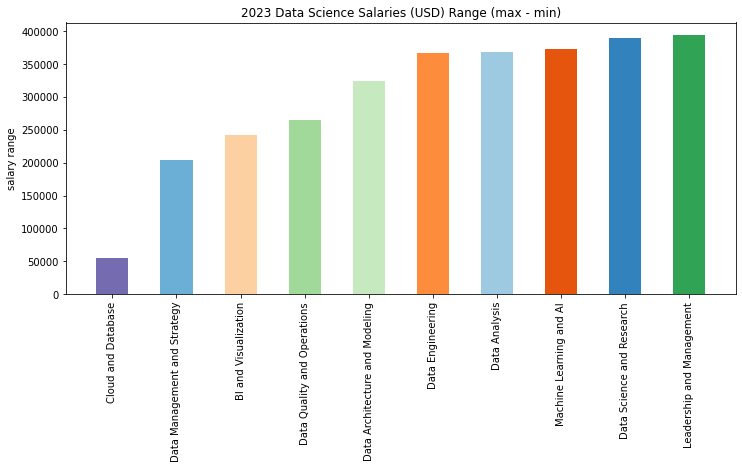

In [37]:
# code inherited from lecture notebook
# job_category - make a group per category
grouped_category = df.groupby("job_category")

def salary_range(x):
    # return range
    return x["salary_in_usd"].max() - x["salary_in_usd"].min()

# get range from grouped items
range_salary = grouped_category.apply(salary_range).sort_values()

# plot
sorted_colors = [colors_dict[i] for i in range_salary.index]
fig, ax = plt.subplots(figsize=(12,5))

ax.set_ylabel("salary range")
ax.bar(range_salary.index, range_salary, 0.5, color = sorted_colors)

plt.title("2023 Data Science Salaries (USD) Range (max - min)")
plt.xticks(rotation=90)

#### Variance

- `Machine Learning and AI`, with the highest avg. salary, also exhibits the greatest variation throughout the dataset
- `Cloud and Database` has the highest standard error - not enough data here, failed to represent a larger population

Could this explain the common career path in Data Science where individuals with limited technology background often start with data analysis and then gradually transition to other areas?

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Cloud and Database'),
  Text(1, 0, 'Data Management and Strategy'),
  Text(2, 0, 'Data Analysis'),
  Text(3, 0, 'BI and Visualization'),
  Text(4, 0, 'Data Engineering'),
  Text(5, 0, 'Data Architecture and Modeling'),
  Text(6, 0, 'Data Quality and Operations'),
  Text(7, 0, 'Leadership and Management'),
  Text(8, 0, 'Data Science and Research'),
  Text(9, 0, 'Machine Learning and AI')])

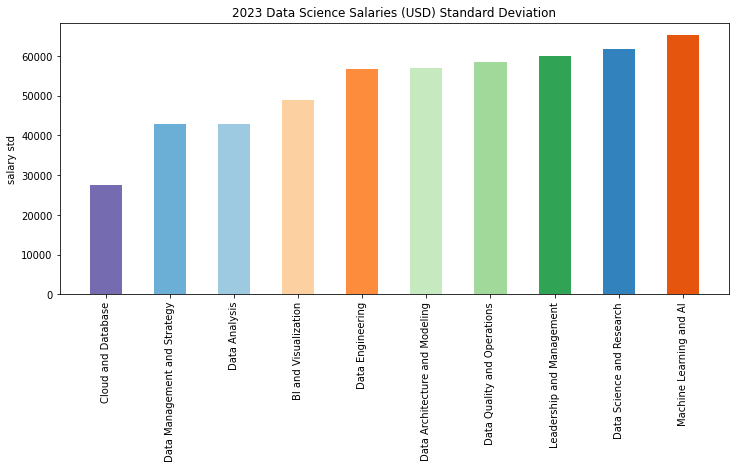

In [38]:
## std - code inherited from lecture notebook
# get standard deviation from grouped items
std_category_salary = df[["job_category", "salary_in_usd"]].groupby("job_category").std().sort_values(by="salary_in_usd")

# plot
sorted_colors = [colors_dict[i] for i in std_category_salary.index]
fig, ax = plt.subplots(figsize=(12,5))

plt.title("std")
plt.xticks(rotation=90)
ax.set_ylabel("salary std")
ax.bar(std_category_salary.index, std_category_salary["salary_in_usd"], 0.5, color=sorted_colors)

plt.title("2023 Data Science Salaries (USD) Standard Deviation")
plt.xticks(rotation=90)

Text(0.5, 1.0, '2023 Data Science Salaries (USD) Standard Error')

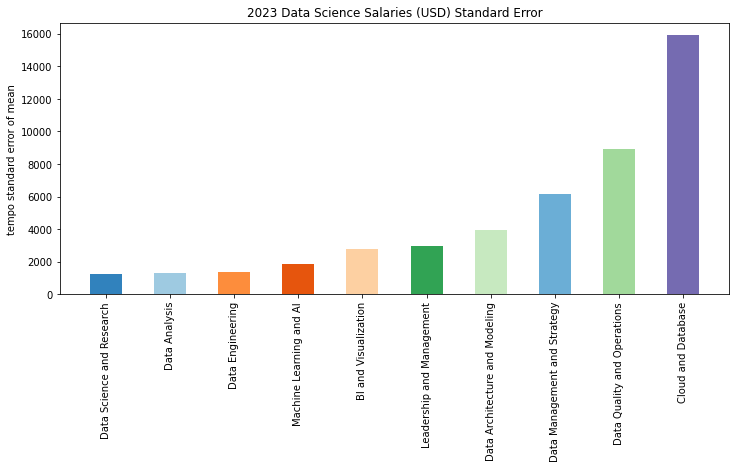

In [39]:
## SEM - code inherited from lecture notebook
# calculating the standard error of the mean for each group
sem_category_salary = df[["job_category", "salary_in_usd"]].groupby("job_category").sem().sort_values(by="salary_in_usd")
sorted_colors = [colors_dict[i] for i in sem_category_salary.index]

# plotting
fig, ax = plt.subplots(figsize=(12,5))
ax.set_ylabel("tempo standard error of mean")
ax.bar(sem_category_salary.index, sem_category_salary["salary_in_usd"], 0.5, color = sorted_colors)
plt.title("std error")
plt.xticks(rotation=90)

plt.title("2023 Data Science Salaries (USD) Standard Error")

In [40]:
# calculating the mean of the 'area' column for each group
mean_salary = df[["job_category", "salary_in_usd"]].groupby("job_category").mean()["salary_in_usd"]
mean_salary

job_category
BI and Visualization              135989.600000
Cloud and Database                141666.666667
Data Analysis                     109895.885714
Data Architecture and Modeling    153436.043269
Data Engineering                  149753.327637
Data Management and Strategy       99130.062500
Data Quality and Operations       105374.906977
Data Science and Research         170201.760166
Leadership and Management         147428.229469
Machine Learning and AI           187841.375105
Name: salary_in_usd, dtype: float64

In [41]:
## confidence intervals - code inherited from lecture notebook
category = df["job_category"].unique()
confidence_intervals = []
num_samples = 100
z = 1.96

for c in category:
    # Get mean for genre
    mean = mean_salary.loc[c]
    
    # Get standard deviation for genre
    std = std_category_salary.loc[c]["salary_in_usd"]
    
    # Get confidence range
    dist = z * (std / np.sqrt(num_samples))
    
    print(c, np.round(mean, 1), "+-", np.round(dist,3))
    confidence_intervals.append([dist,dist])

Data Science and Research 170201.8 +- 12113.574
Data Management and Strategy 99130.1 +- 8389.08
Data Analysis 109895.9 +- 8395.065
Machine Learning and AI 187841.4 +- 12765.066
Data Engineering 149753.3 +- 11112.131
BI and Visualization 135989.6 +- 9566.557
Leadership and Management 147428.2 +- 11761.937
Data Quality and Operations 105374.9 +- 11477.413
Data Architecture and Modeling 153436.0 +- 11174.833
Cloud and Database 141666.7 +- 5397.419


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


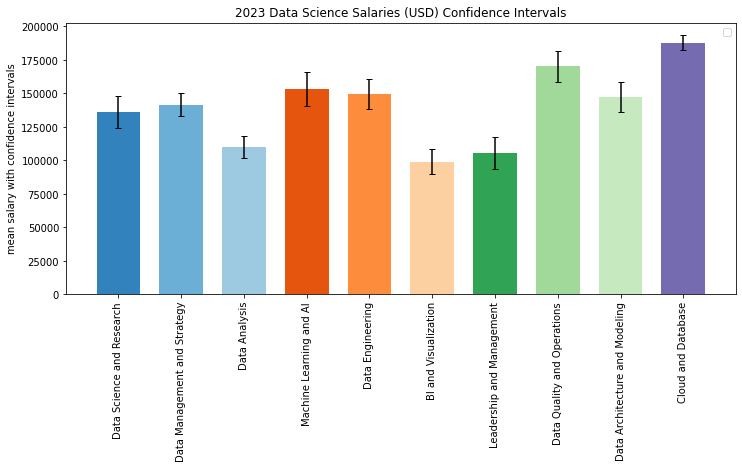

In [42]:
## plot
fig, ax = plt.subplots(figsize=(12,5))
ax.bar(areas, mean_salary, 0.7, color=colors_list, yerr=np.array(confidence_intervals).T, align='center', capsize=3)
ax.set_ylabel("mean salary with confidence intervals")
plt.title("2023 Data Science Salaries (USD) Confidence Intervals")
plt.xticks(rotation=90)
plt.legend()

(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,
         7000.,  8000.]),
 [Text(-1000.0, 0, '−1000'),
  Text(0.0, 0, '0'),
  Text(1000.0, 0, '1000'),
  Text(2000.0, 0, '2000'),
  Text(3000.0, 0, '3000'),
  Text(4000.0, 0, '4000'),
  Text(5000.0, 0, '5000'),
  Text(6000.0, 0, '6000'),
  Text(7000.0, 0, '7000'),
  Text(8000.0, 0, '8000')])

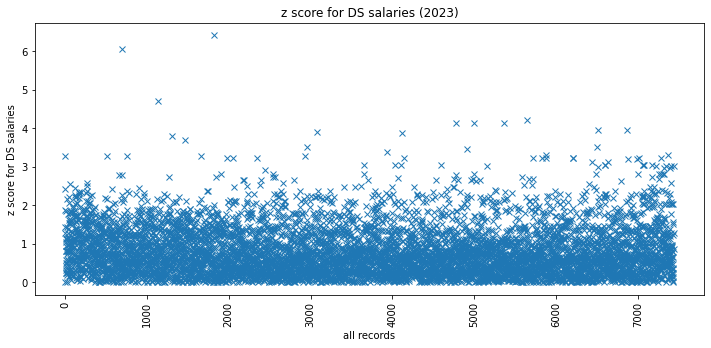

In [43]:
## Z Scores - code inherited from lecture notebook
for c in category:
    mean = mean_salary.loc[c]
    std = std_category_salary.loc[c]["salary_in_usd"]
    group = df[df["job_category"]==c]
    # calculate zscore
    dist = np.abs(group["salary_in_usd"]-mean)/std
    
    # select rows from group, set zscore coloumn
    # using the .loc to assign values to a new column
    df.loc[group.index, "zscore"] = dist

# plotting 
fig, ax = plt.subplots(figsize=(12,5))
y = df["zscore"].values
ax.set_ylabel("z score for DS salaries")
ax.set_xlabel("all records")
ax.plot(y,"x")

plt.title("z score for DS salaries (2023)")
plt.xticks(rotation=90)

#### Distribution

- The dataset exhibits a distribution that is close to normal, with a slight right skewness. **[lognorm][skewnorm]**
- best fit distribution among all - `johnsonsu`/`lognorm`

In [44]:
import warnings
import scipy.stats as st
import statsmodels.api as sm
from scipy.stats._continuous_distns import _distn_names
import matplotlib

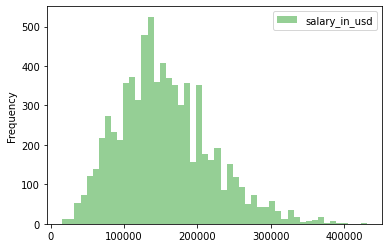

In [45]:
salary_data = df['salary_in_usd']

# create a histogram plot using the plot method on the height_data
plt.figure(figsize=(6,4))
ax = salary_data.plot(kind='hist', bins=50, density=False, alpha=0.5, color=list(matplotlib.rcParams['axes.prop_cycle'])[2]['color'], legend=True)

# density=False: specifies that the y-axis represents counts, not density.
# alpha=0.5: sets the transparency of the bars to 0.5, making them semi-transparent.
# color=list(matplotlib.rcParams['axes.prop_cycle'])[1]['color']: uses the second color from the default color cycle.

Text(0, 0.5, 'Density')

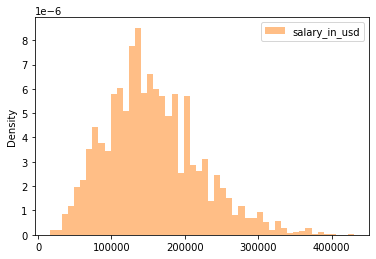

In [46]:
# plot as probability density distribution
plt.figure(figsize=(6,4))
ax = salary_data.plot(kind='hist', bins=50, density=True, alpha=0.5, color=list(matplotlib.rcParams['axes.prop_cycle'])[1]['color'], legend=True)
ax.set_ylabel('Density')

##### Define PDF & distribution fitting functions

In [47]:
# define a function to generates a Probability Distribution Function (PDF) for a given statistical distribution, parameters, and size
# specific distribution (dist)
# parameters (params)
# the number of points (size) for the PDF

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]  # extracts the distribution parameters except for the last two (assumed to be loc and scale)
    loc = params[-2]   # assigns the second-to-last parameter to the loc variable
    scale = params[-1] # assigns the last parameter to the scale variable

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

In [48]:
def best_fit_distribution(data, dist_names, bins=200, ax=None, legend=True):
    """Model data by finding best fit distribution to data"""
    # Code adapted from: https://stackoverflow.com/questions/6620471/fitting-empirical-distribution-to-theoretical-ones-with-scipy-python
    # get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    # calculate midpoints of the bins (x)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # empty list for best holders
    best_distributions = []

    # estimate distribution parameters from data - iterates over a list of distribution names
    for ii, distribution in enumerate([d for d in dist_names if not d in ['levy_stable', 'studentized_range']]):
        # gets the corresponding distribution (depends on the dist_names we created) from scipy.stats using getattr(st, distribution).
        distribution = getattr(st, distribution)

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')
                
                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]
                
                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))
                
                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax, legend=legend, label=distribution.name)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                best_distributions.append((distribution, params, sse))
        
        except Exception:
            pass

    return sorted(best_distributions, key=lambda x:x[2])

In [49]:
def compare_and_plot_distributions(data, dist_names, legend=True):
    # Plot for comparison
    plt.figure(figsize=(8,6))
    ax = data.plot(kind='hist', bins=50, density=True, alpha=0.5, color=list(matplotlib.rcParams['axes.prop_cycle'])[1]['color'], legend=legend)
    ax.set_ylabel('Density')

    # Save plot limits
    dataYLim = ax.get_ylim()

    # Find best fit distribution
    best_distibutions = best_fit_distribution(data, dist_names, 200, ax, legend)
    best_dist = best_distibutions[0]

    # Update plots
    ax.set_ylim(dataYLim)

    # Make PDF with best params 
    pdf = make_pdf(best_dist[0], best_dist[1])

    # Display
    plt.figure(figsize=(8,6))
    plt.legend(loc='upper right')
    ax = pdf.plot(lw=2, label='PDF', legend=legend)
    ax.set_ylabel('Density')
    data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=legend, ax=ax)

    param_names = (best_dist[0].shapes + ', loc, scale').split(', ') if best_dist[0].shapes else ['loc', 'scale']
    param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_dist[1])])
    dist_str = '{}({})'.format(best_dist[0].name, param_str)

    ax.set_title(u'Best fit distribution \n' + dist_str)

##### Distribution Fitting - lognorm

In [50]:
print(_distn_names)

['ksone', 'kstwo', 'kstwobign', 'norm', 'alpha', 'anglit', 'arcsine', 'beta', 'betaprime', 'bradford', 'burr', 'burr12', 'fisk', 'cauchy', 'chi', 'chi2', 'cosine', 'dgamma', 'dweibull', 'expon', 'exponnorm', 'exponweib', 'exponpow', 'fatiguelife', 'foldcauchy', 'f', 'foldnorm', 'weibull_min', 'truncweibull_min', 'weibull_max', 'genlogistic', 'genpareto', 'genexpon', 'genextreme', 'gamma', 'erlang', 'gengamma', 'genhalflogistic', 'genhyperbolic', 'gompertz', 'gumbel_r', 'gumbel_l', 'halfcauchy', 'halflogistic', 'halfnorm', 'hypsecant', 'gausshyper', 'invgamma', 'invgauss', 'geninvgauss', 'norminvgauss', 'invweibull', 'johnsonsb', 'johnsonsu', 'laplace', 'laplace_asymmetric', 'levy', 'levy_l', 'logistic', 'loggamma', 'loglaplace', 'lognorm', 'gibrat', 'maxwell', 'mielke', 'kappa4', 'kappa3', 'moyal', 'nakagami', 'ncx2', 'ncf', 't', 'nct', 'pareto', 'lomax', 'pearson3', 'powerlaw', 'powerlognorm', 'powernorm', 'rdist', 'rayleigh', 'loguniform', 'reciprocal', 'rice', 'recipinvgauss', 'semi

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


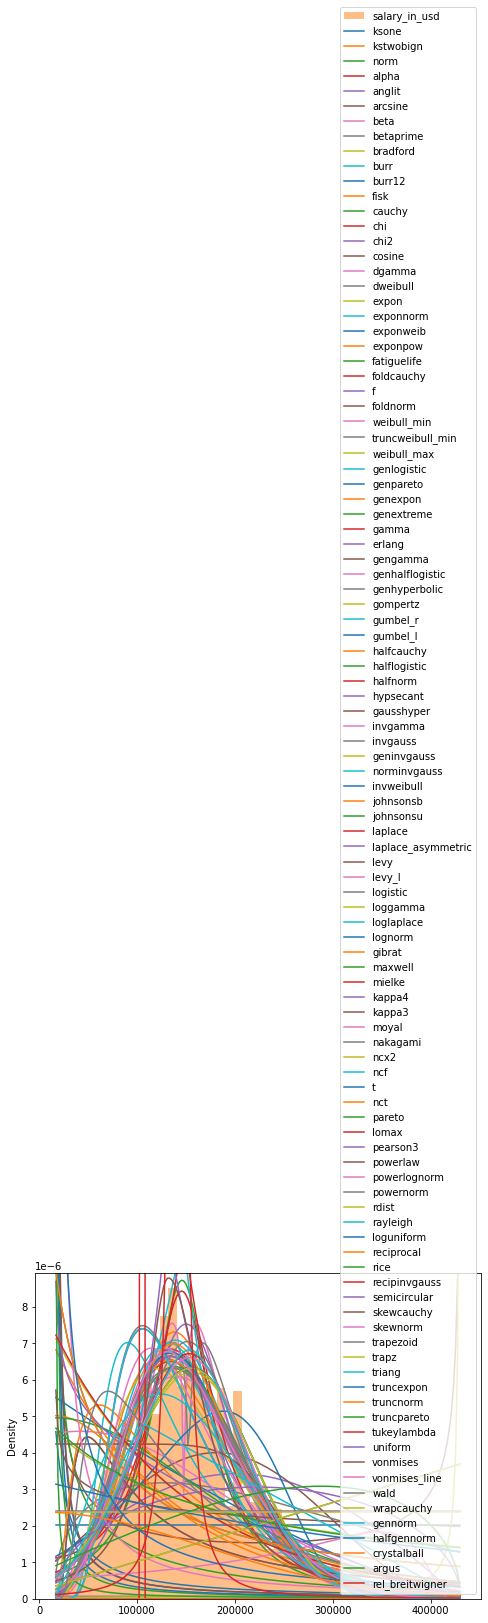

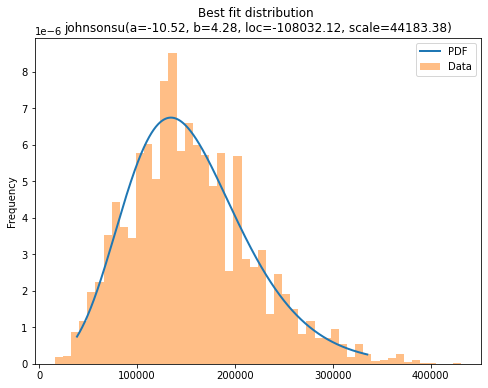

In [51]:
compare_and_plot_distributions(salary_data, _distn_names)

As shown above, the best fit distribution is **johnsonsu**, which is pretty close to a normal distribution, with some outliers (extremely high salaries) which makes sense in the field.

In [52]:
dist_names = ['norm', 'expon', 'skewnorm', 'lognorm']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


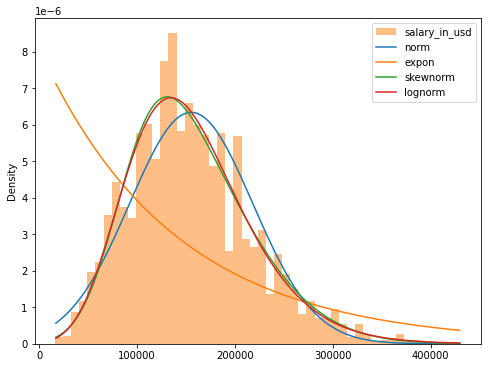

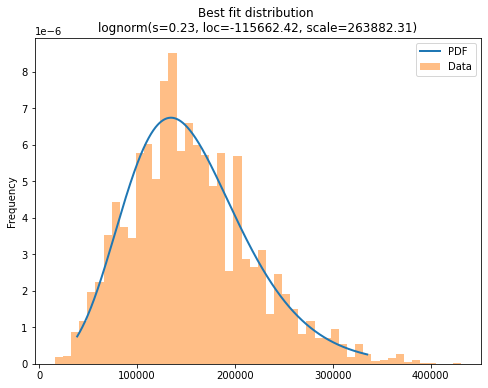

In [53]:
compare_and_plot_distributions(salary_data, dist_names)

### Visualisations (Exploring different charts & plots)

I have explored the use of various charts and plots here to see what information I can glean from the graphs, mainly using Matplotlib and Seaborn. The charts and plots include:
- Histogram
- Pie chart
- Bar chart
- Count Plot (Seaborn)
- Violin Plot (Seaborn)
- Scatter
- Box Plot (Seaborn)
- KDE Plot (Seaborn)
- Stacked Histogram
- Stacked Bar
- Crosstab Heatmap (Seaborn)

##### Dataset Overview - histogram/countplot/pie chart/bar chart

- At a glance, this dataset appears to be close to a normal distribution with a slight right skewness due to outliers. There are a few individuals with really high salaries.
- Most individuals' salaries recorded in this dataset are around $130,000. (higher than avg. job salaries in the UK?)
- The count plots show that most data entries are related to `Data Science and Research`, `Data Analysis`, `Machine Learning and Ai`, and `Data Engineering` (category-wise), and `Senior` level positions (experience level-wise)
  - it could possibly indicate that those categories are the most popular ones in the industry, or, it may also because the data is not that representative of o a larger population (unsure about the collection method) 
  - data management and strategy should be quite popular one, or maybe most people put this one in the business/strategy category rather than data science?
- Pie chart works great in showing percentage of each category in the whole dataset, e.g., most data entries are related to `data science and research` in terms of category, `senior` level in terms of experience, the `U.S.` in terms of company location, and `in-person` in terms of work setting. Though because there are too many labels especially in compnay location pie chart, the chart itself and labels are not well-formatted or easy to read
  - in the updated version, I have only displayed the top 3 labels and autopct so the chart is clean and easier to read data

(array([-10000.,      0.,  10000.,  20000.,  30000.,  40000.,  50000.,
         60000.,  70000.,  80000.,  90000., 100000., 110000., 120000.,
        130000., 140000., 150000., 160000., 170000., 180000., 190000.,
        200000., 210000., 220000., 230000., 240000., 250000., 260000.,
        270000., 280000., 290000., 300000., 310000., 320000., 330000.,
        340000., 350000., 360000., 370000., 380000., 390000., 400000.,
        410000., 420000., 430000., 440000., 450000.]),
 [Text(-10000.0, 0, '-10,000'),
  Text(0.0, 0, '0'),
  Text(10000.0, 0, '10,000'),
  Text(20000.0, 0, '20,000'),
  Text(30000.0, 0, '30,000'),
  Text(40000.0, 0, '40,000'),
  Text(50000.0, 0, '50,000'),
  Text(60000.0, 0, '60,000'),
  Text(70000.0, 0, '70,000'),
  Text(80000.0, 0, '80,000'),
  Text(90000.0, 0, '90,000'),
  Text(100000.0, 0, '100,000'),
  Text(110000.0, 0, '110,000'),
  Text(120000.0, 0, '120,000'),
  Text(130000.0, 0, '130,000'),
  Text(140000.0, 0, '140,000'),
  Text(150000.0, 0, '150,000'),
  Te

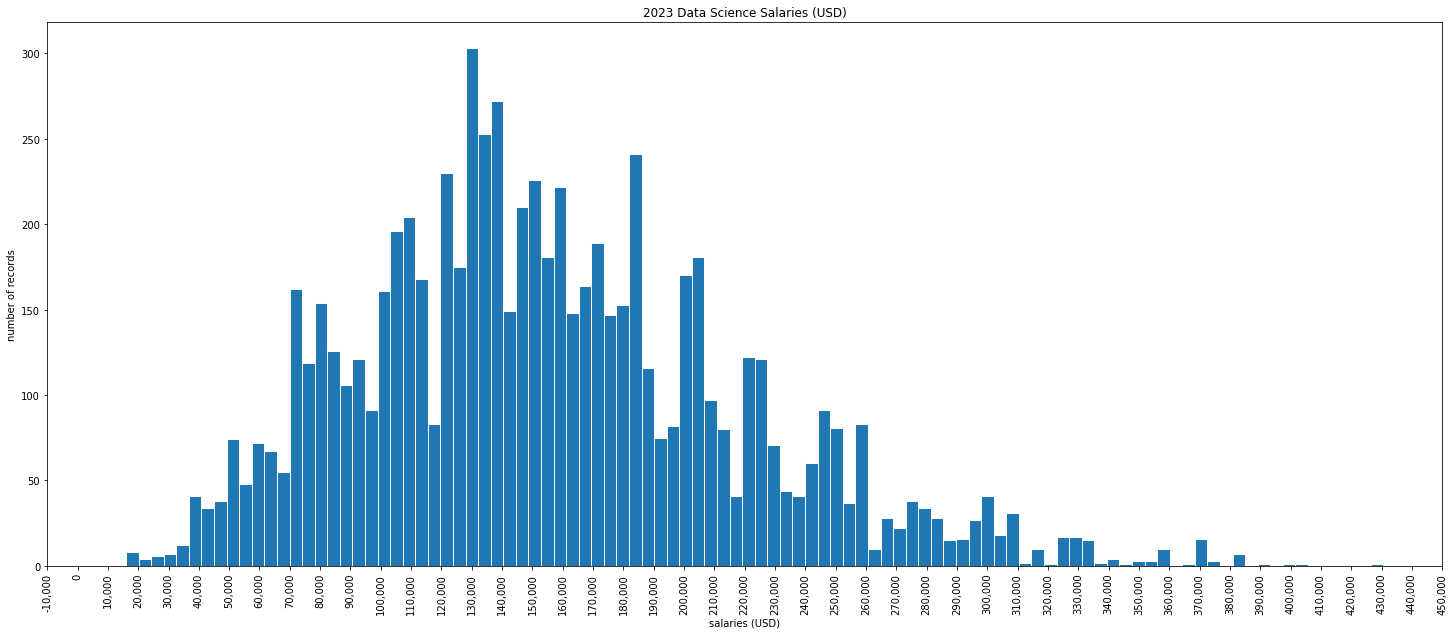

In [54]:
fig, ax = plt.subplots(figsize=(25,10)) 
number_of_bins = 100

# plot histogram
h = ax.hist(salary, bins=number_of_bins, edgecolor="white")

# customise x-axis ticks and labels
# reference code found in: https://matplotlib.org/stable/api/ticker_api.html
ax.xaxis.set_major_locator(MultipleLocator(10000))

# set x-axis limits explicitly to start from 0
ax.set_xlim(0, max(salary) + 10000)
plt.xticks(rotation=90)

# set tick labels and format + thousand separators
# reference code: https://stackoverflow.com/questions/1823058/how-to-print-a-number-using-commas-as-thousands-separators
ticks = ax.get_xticks()
ax.set_xticks(ticks)
ax.set_xticklabels([f"{int(tick):,}" for tick in ticks])

ax.set_ylabel("number of records")
ax.set_xlabel("salaries (USD)")
plt.title("2023 Data Science Salaries (USD)")
plt.xticks(rotation=90)

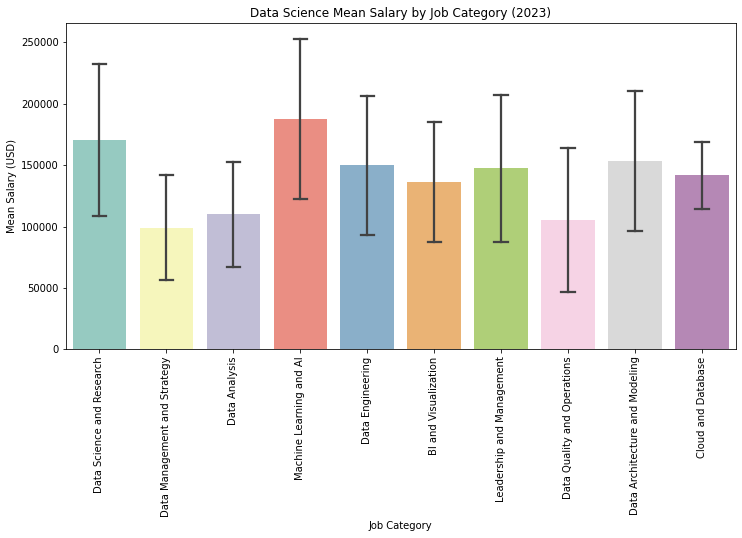

In [55]:
# bar chart with error bar to show mean salaries by job category
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="job_category", y="salary_in_usd", hue="job_category", errorbar='sd', capsize=0.2, palette="Set3")
plt.xticks(rotation=90)
plt.xlabel("Job Category")
plt.ylabel("Mean Salary (USD)")
plt.title("Data Science Mean Salary by Job Category (2023)")
plt.show()

Text(0.5, 1.0, '2023 Data Science Salaries (USD) - Count by category')

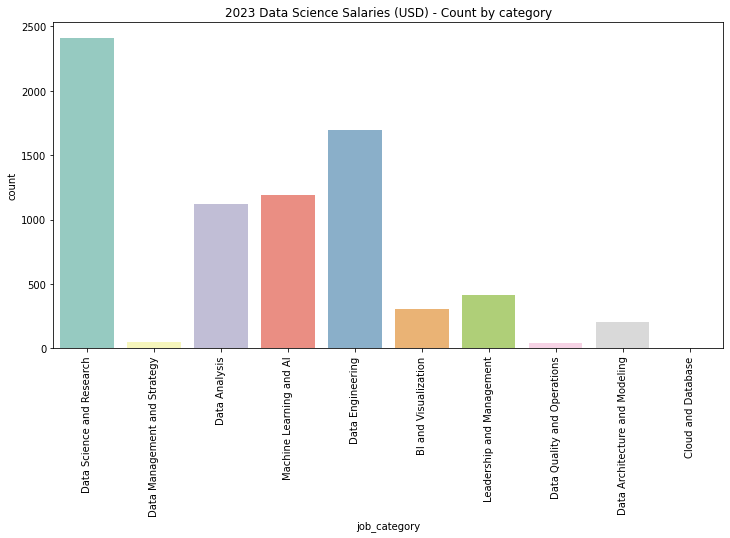

In [56]:
# countplots to show the count distribution across different categories
plt.figure(figsize=(12, 6))
sns.countplot(x="job_category", hue="job_category", data=df, palette="Set3")
plt.xticks(rotation=90)
plt.title("2023 Data Science Salaries (USD) - Count by category")

Text(0.5, 1.0, '2023 Data Science Salaries (USD) - Count by experience level')

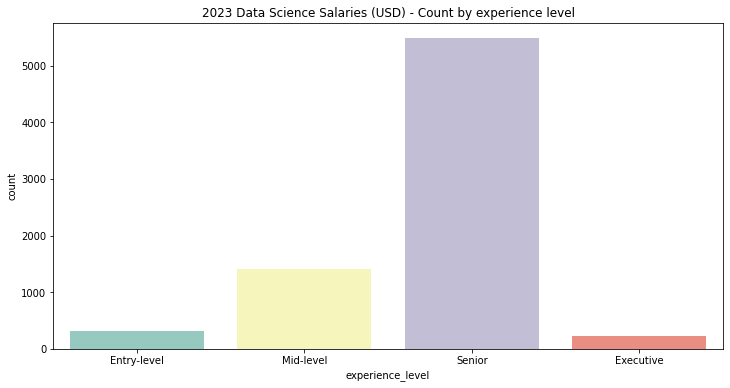

In [57]:
# countplots to show the count distribution across different experience levels
plt.figure(figsize=(12, 6))
sns.countplot(x="experience_level", hue="experience_level", data=df, palette="Set3")
plt.title("2023 Data Science Salaries (USD) - Count by experience level")

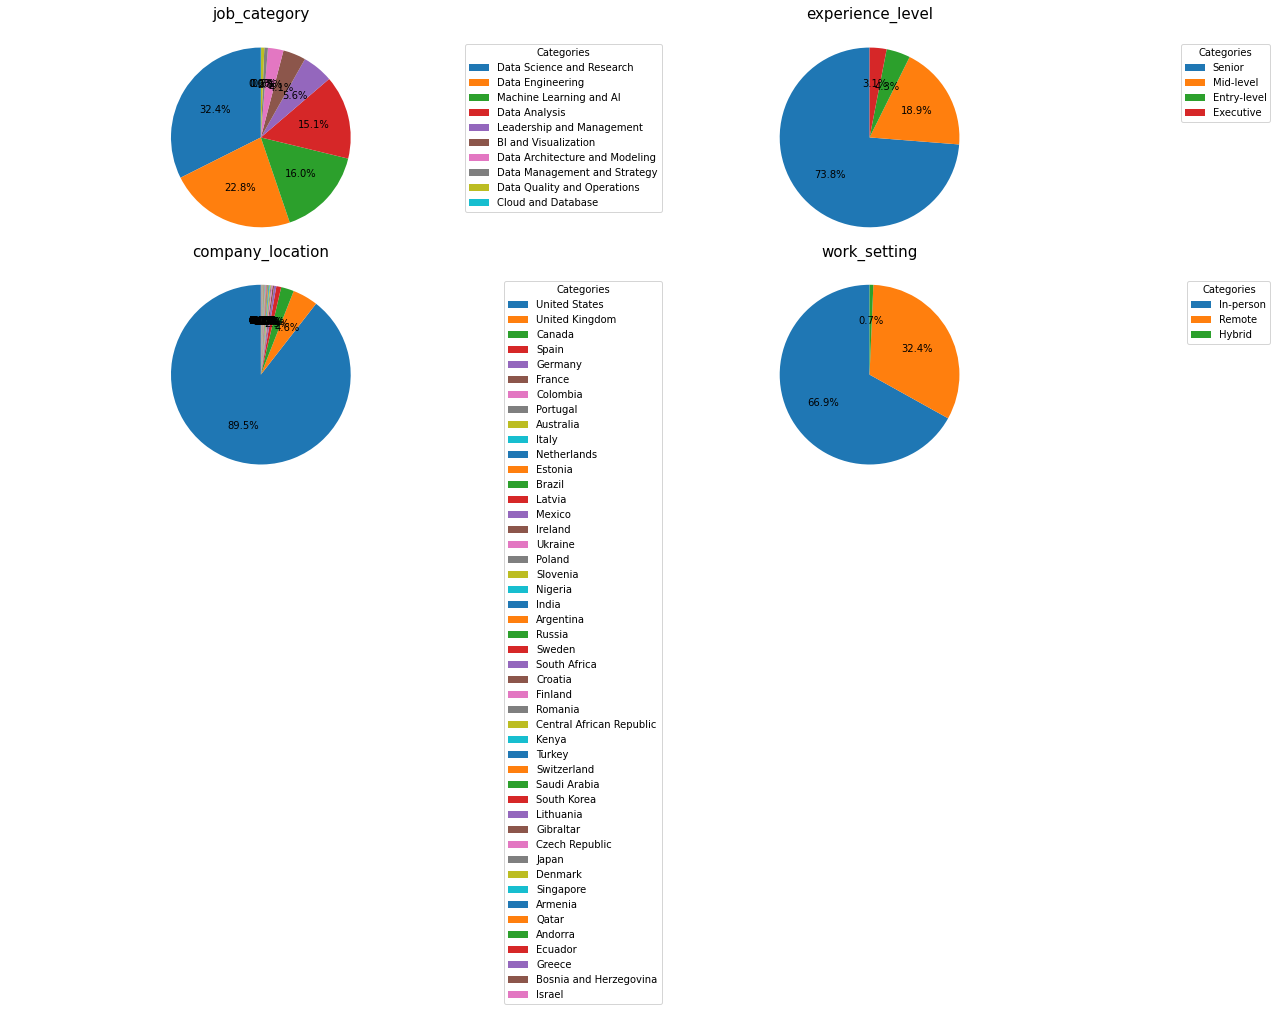

In [58]:
# create a grid of subplots - pie charts
rows = 2
cols = 2
fig, ax = plt.subplots(rows, cols, figsize=(20,8))

order = ['job_category', 'experience_level', 'company_location', 'work_setting']

# iterates through order & create pie plot
for i, tag in enumerate(order):
    col = i%cols                                   
    row = int(np.floor(i/cols))                   
    axis = ax[row, col]                            

    # plotting data in each subplot
    # pie chart customisation reference code: https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html
    counts = df[tag].value_counts()
    axis.pie(counts, labels=None, autopct='%1.1f%%', startangle=90)
    # chatGPT used here to find out hot to specify the position of a legend - bbox_to_anchor
    axis.legend(labels=counts.index, loc="upper right", title="Categories", fontsize='10', bbox_to_anchor=(1.3, 1))
    axis.axis('equal')
    axis.set_title(tag, fontsize='15', pad=20)


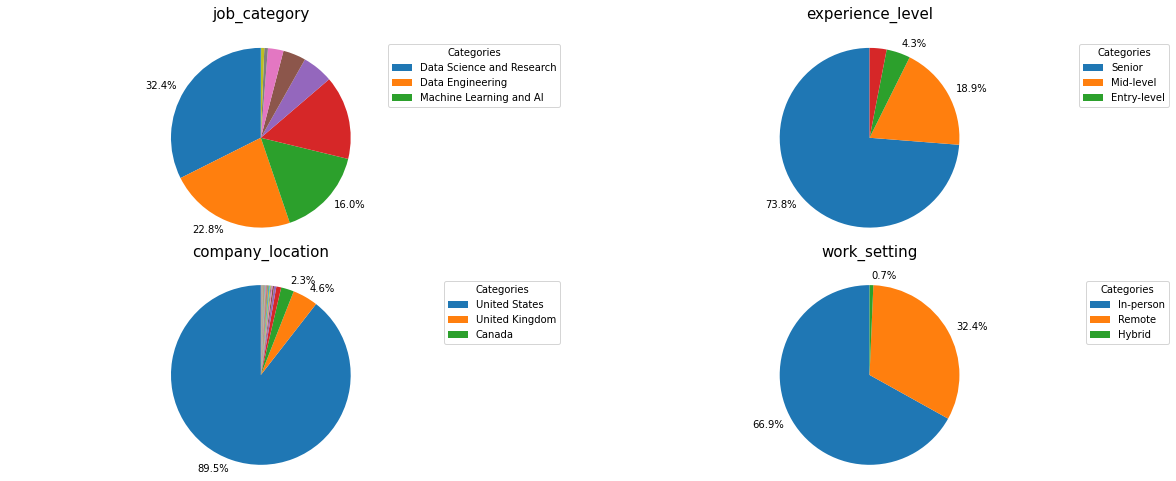

In [59]:
# create a grid of subplots - pie charts - updated version for a clean display
rows = 2
cols = 2
fig, ax = plt.subplots(rows, cols, figsize=(20,8))

order = ['job_category', 'experience_level', 'company_location', 'work_setting']

# iterates through order & create pie plot
for i, tag in enumerate(order):
    col = i%cols                                   
    row = int(np.floor(i/cols))                   
    axis = ax[row, col]                            

    counts = df[tag].value_counts()
    
    # sort the counts and select the top 3 - only display the top 3 for a clean display!
    # .nlargest() reference code found in: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nlargest.html
    top_counts = counts.nlargest(3)
    all_labels = counts.index.tolist()
    autopct_values = [(entry / len(df)) * 100 for entry in counts]
    # check if label is top 3, if not display empty str
    # zip() reference code: https://www.geeksforgeeks.org/zip-in-python/ 
    # ChatGPT used here to debug
    autopct_labels = ['%1.1f%%' % autopct if label in top_counts.index else '' for label, autopct in zip(all_labels, autopct_values)]
    
    axis.pie(counts, labels=autopct_labels, startangle=90)
    
    # show only the top 3
    axis.legend(labels=counts.index[:3], loc="upper right", title="Categories", fontsize='10', bbox_to_anchor=(1.1, 1))
    axis.axis('equal')
    axis.set_title(tag, fontsize='15', pad=20)


##### Distributions by job categories/experience level - violin plot & box plot
- Python Library Seaborn is adapted here to create some nice plots (https://seaborn.pydata.org/index.html#)
- Seaborn is built on top of matplotlib (more comprehensive); easier/quicker to create visually appealing plots with less code


- The violin plot provides a comprehensive overview of the data distribution as well as statistics, it can also clearly show the comparisons over multiple categories
  - the width of the violin represents the density/concentration of data points at that value - wider part means more data points at that salary
  - longer tails means skewness (outliers)
- The box plot looks similar to the violin plot, but it provides more details in summary statistics and outliers, and doesn't really have a view of the data distribution
  - explicitly highlight outliers - those round shapes outside the box


Insights gained from looking at the graphs:
- Almost every category has a `right skewness` (longer tail at the end) except for Cloud and Database, meaning there are few individuals with extremely high salaries were included in the dataset (outliers)
- Most positions in `Data Management and Strategy` have a relatively low salaries compared to other categories.
- `Cloud and Database` seem to have no outliers, but this is because only three salary entries were included. Interpretation should consider other plots and graphs as well (looking at only one plot will lead to misinterpretation of the dataset)
- `Leadership and Management` has the widest outlier spread (makes sense as leadership positions could be offered with really high salaries, depending on the size of the company?)
- In terms of experience level, the salary distribution represents a reasonable trend (higher level, higher salary); however, in terms of outliers, `mid-level` positions (I thought it should be executive positons?) seems to have the widest outlier spread.

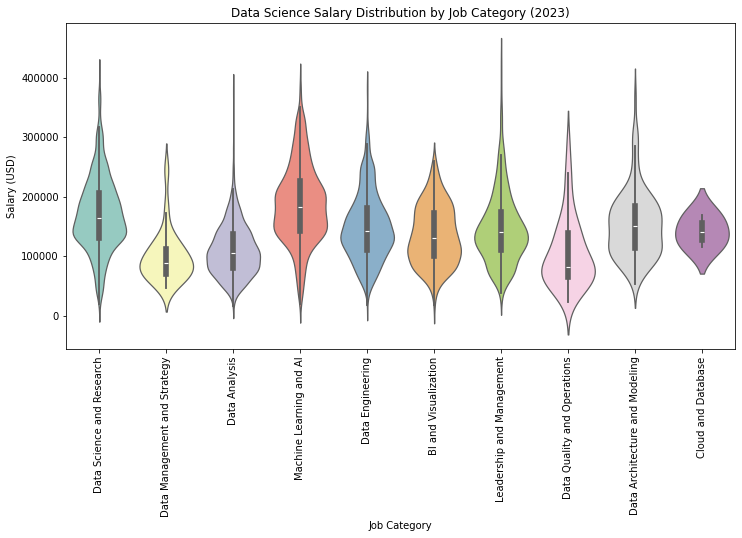

In [60]:
# salary distribution by job categories
# reference code found in: https://seaborn.pydata.org/examples/wide_form_violinplot.html
plt.figure(figsize=(12, 6))
sns.violinplot(x="job_category", y="salary_in_usd", data=df, hue="job_category", palette="Set3", inner="box")
plt.xticks(rotation=90) # plt.xticks(rotation=45) doesnt really work - looks kinda messy for unknown reasons
plt.xlabel("Job Category")
plt.ylabel("Salary (USD)")
plt.title("Data Science Salary Distribution by Job Category (2023)")
plt.show()

<Axes: title={'center': 'Data Science Salary Distribution by Job Category (2023)'}, xlabel='Job Category', ylabel='Salary (USD)'>

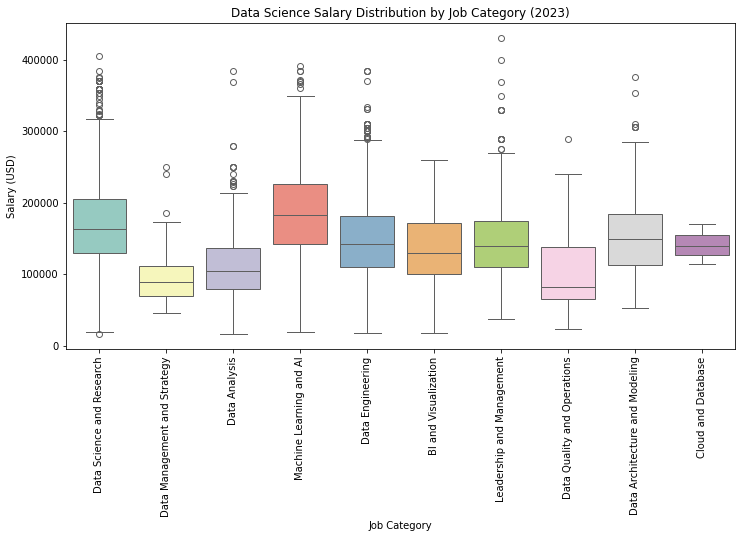

In [61]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=90)
plt.xlabel("Job Category")
plt.ylabel("Salary (USD)")
plt.title("Data Science Salary Distribution by Job Category (2023)")
sns.boxplot(x="job_category", y="salary_in_usd", hue="job_category", data=df, palette="Set3")

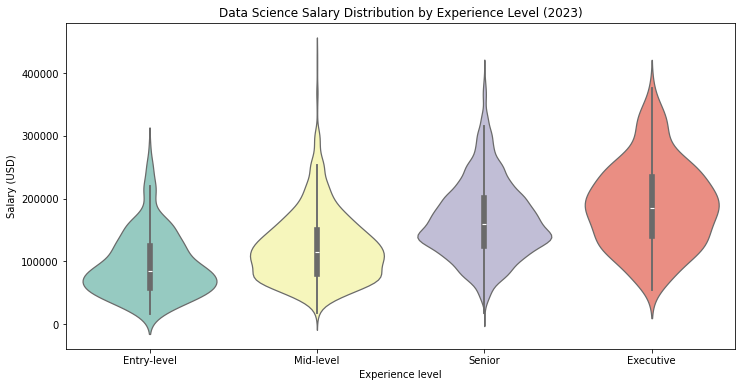

In [62]:
# salary distribution by experience level
plt.figure(figsize=(12, 6))
sns.violinplot(x="experience_level", y="salary_in_usd", data=df, hue="experience_level", palette="Set3", inner="box")
plt.xlabel("Experience level")
plt.ylabel("Salary (USD)")
plt.title("Data Science Salary Distribution by Experience Level (2023)")
plt.show()

<Axes: title={'center': 'Data Science Salary Distribution by Experience Level (2023)'}, xlabel='Experience level', ylabel='Salary (USD)'>

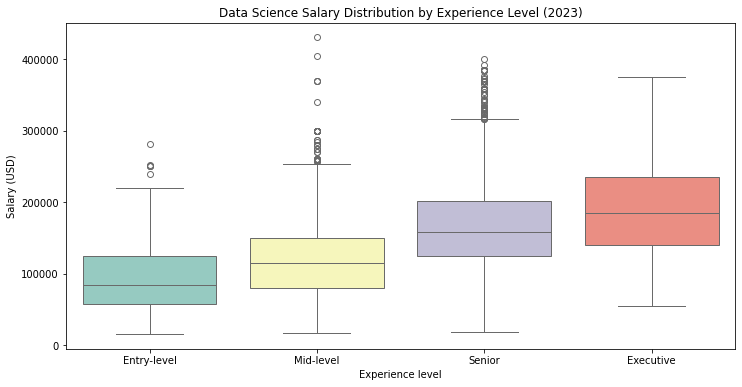

In [63]:
plt.figure(figsize=(12, 6))
plt.xlabel("Experience level")
plt.ylabel("Salary (USD)")
plt.title("Data Science Salary Distribution by Experience Level (2023)")
sns.boxplot(x="experience_level", y="salary_in_usd", hue="experience_level", data=df, palette="Set3")

##### Distributions by experience level - kdeplot/stacked hist

- kdeplot in Seaborn creates Kernel Density Estimation (KDE) plots - useful for comparing distributions between different categories - this can be included in a stacked hist using `kde=True`

- The KDE plots tells that most of the data included in this dataset are `senior` level positions, and much less data included that are entry level and executive level positions
- The stacked histograms validates the above point, and it shows most `entry and mid level` jobs salaries are in the left part (lower ones), and `executive` salaries are in the right part (tho it is a bit too small to be clearly seen in this plot)

Text(0.5, 1.0, 'Data Science Salary Distribution Stacked Histogram by experience level (2023)')

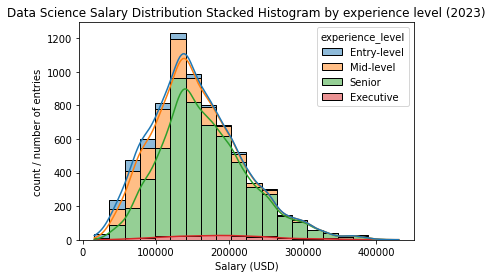

In [64]:
# stacked histograms to visualise the salary distribution within each experience level
# reference code: https://seaborn.pydata.org/generated/seaborn.histplot.html
sns.histplot(data=df, x="salary_in_usd", hue="experience_level", multiple="stack", bins=20, kde=True)
plt.xlabel("Salary (USD)")
plt.ylabel("count / number of entries")
plt.title("Data Science Salary Distribution Stacked Histogram by experience level (2023)")

##### Distributions by experience level & job categories - crosstab heatmap

- crosstab heatmap (Seaborn) combines a crosstabulation table and a heatmap to show the relationships and frequency counts between job category & experience level; in terms of overall data distribution, this is a easier (than showing separately) and appealing way to show how data is distributed across two variables
- most data entries are related to `senior Leadership & Management` positons
- insufficient data for `Cloud and Database` to draw any meaningful insight
- no data available for `executive` positons in `cloud and database`, `data management and strategy`, and `data quality and operations`.

Text(0.5, 1.0, 'Data Science Salary Dataset Distributions (2023) - crosstab heatmap')

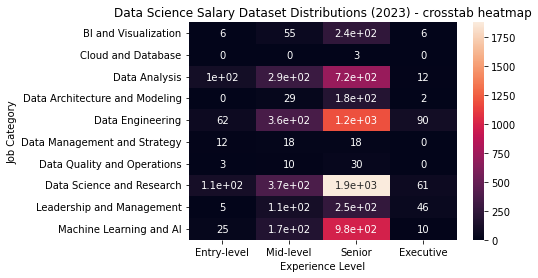

In [76]:
# crosstab heatmap - visualise the cross-tabulation of experience level & job category
# reference code: https://seaborn.pydata.org/generated/seaborn.heatmap.html
crosstab = pd.crosstab(df["job_category"], df["experience_level"])
sns.heatmap(crosstab, annot=True)
plt.ylabel("Job Category")
plt.xlabel("Experience Level")
plt.title("Data Science Salary Dataset Distributions (2023) - crosstab heatmap")

##### Distributions across experience levels within each job category (Mean/Count) - stacked bar 

- the first stacked bar plot tells how salary(mean) is distributed across experience levels within each job category
  - `executive` positions have the highest average salary, while `entry-level` positions have the lowest
  - within the executive level, `Machine Learning and AI` roles have the highest salaries compared to other categories at the same level
- the second stacked bar plot focuses on the data count
  - most data recorded in this dataset are `senior` level positons and `data science and research` related positions (the same insight can also be drawn from the above crosstab heatmap - I personally prefer the crosstab heatmap as it is more accurate in terms of exact count) 

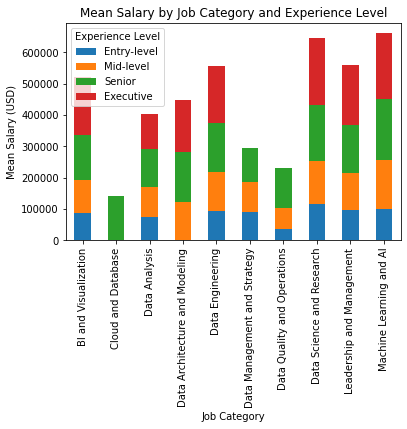

In [86]:
# stacked bar plot 1 - mean salary across experience levels within each job category
# reference code: https://medium.com/@jb.ranchana/easy-way-to-create-stacked-bar-graphs-from-dataframe-19cc97c86fe3
# reference code: https://stackoverflow.com/questions/48799718/pandas-pivot-table-to-stacked-bar-chart
pivotable_1 = df.pivot_table(index='job_category', columns='experience_level', values='salary_in_usd')
pivotable_1.plot(kind='bar', stacked=True)
plt.xlabel('Job Category')
plt.ylabel('Mean Salary (USD)')
plt.title('Mean Salary by Job Category and Experience Level')
plt.xticks(rotation=90)
plt.legend(title='Experience Level')
plt.show() 

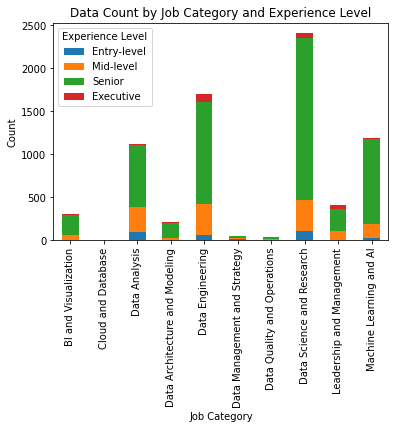

In [90]:
# stacked bar plot 2 - job category vs. experience level
# aggfunc=size - count the number of occurrences
# reference code: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html
pivotable_2 = df.pivot_table(index='job_category', columns='experience_level', aggfunc='size')
pivotable_2.plot(kind='bar', stacked=True)
plt.xlabel("Job Category")
plt.ylabel("Count")
plt.title('Data Count by Job Category and Experience Level')
plt.xticks(rotation=90)
plt.legend(title="Experience Level")
plt.show()

##### Mean salary by locations & company size & work setting - bar chart

- While the pie charts above show that most entries are individuals working/living in the U.S., it is interesting to note that the highest mean salary by Company Location & employee residence is actually in `Qatar`, with the U.S. not even in the `top 3 (Qatar, Australia, Japan)`
- Smaller sized company have a relatively lower avg. salary
- and surprisingly, working remotely doesn't seem to affect salary that much, though a hybrid work setting shows a lower avg. salary (again, possibly due to insufficent data, as hybrid only accounts for 0.3% of the whole dataset)

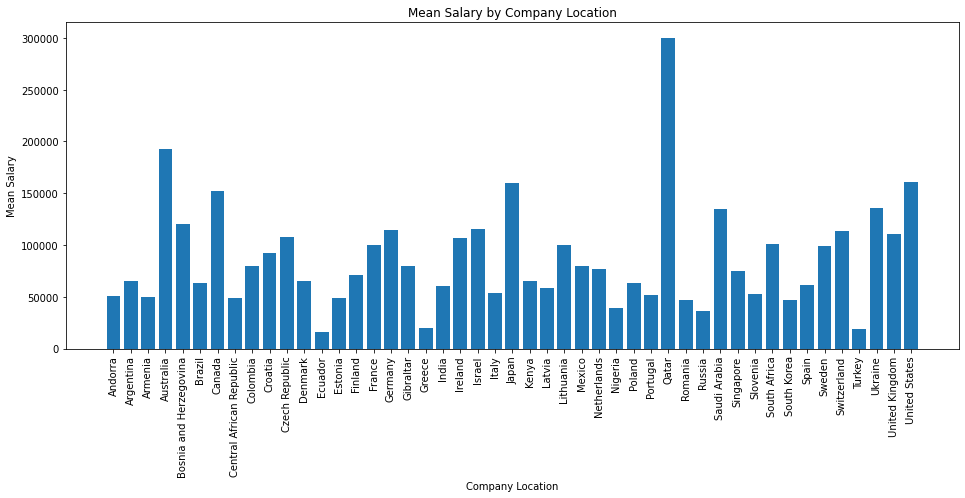

In [68]:
mean_salaries = df.groupby('company_location')['salary_in_usd'].mean()
plt.figure(figsize=(16, 6))
plt.bar(mean_salaries.index, mean_salaries.values)
plt.xlabel('Company Location')
plt.ylabel('Mean Salary')
plt.title('Mean Salary by Company Location')
plt.xticks(rotation=90)
plt.show()

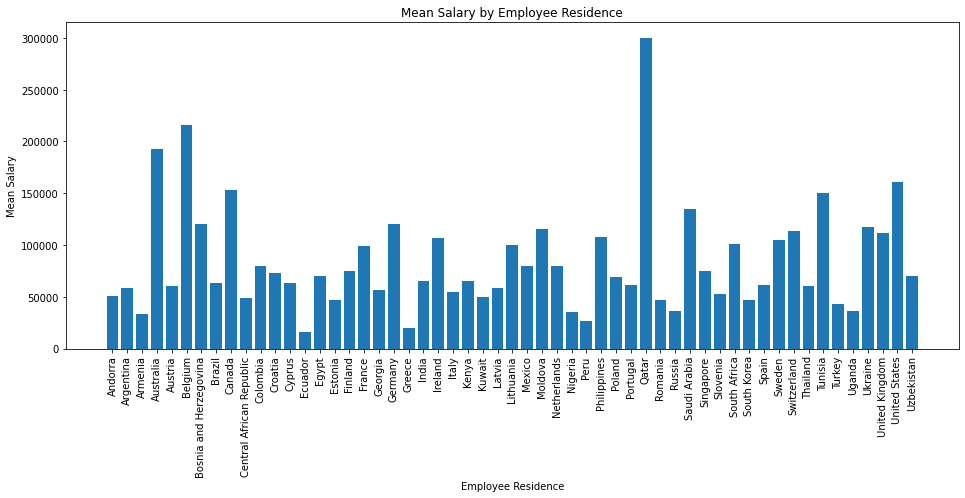

In [69]:
mean_salaries = df.groupby('employee_residence')['salary_in_usd'].mean()
plt.figure(figsize=(16, 6))
plt.bar(mean_salaries.index, mean_salaries.values)
plt.xlabel('Employee Residence')
plt.ylabel('Mean Salary')
plt.title('Mean Salary by Employee Residence')
plt.xticks(rotation=90)
plt.show()

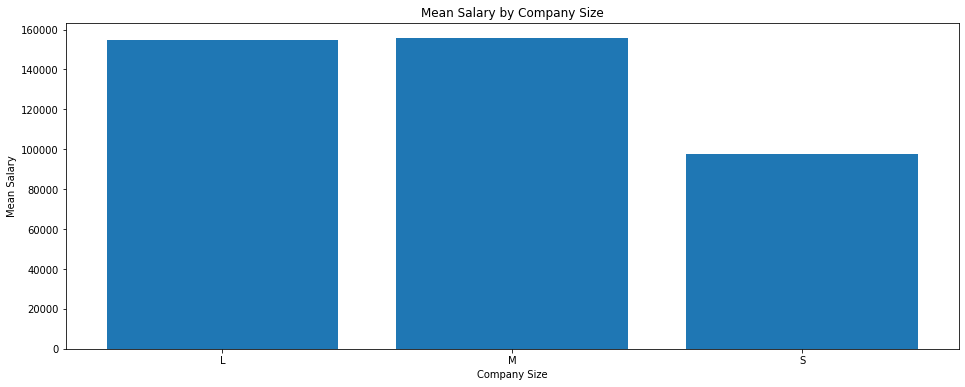

In [70]:
mean_salaries = df.groupby('company_size')['salary_in_usd'].mean()
plt.figure(figsize=(16, 6))
plt.bar(mean_salaries.index, mean_salaries.values)
plt.xlabel('Company Size')
plt.ylabel('Mean Salary')
plt.title('Mean Salary by Company Size')
plt.show()

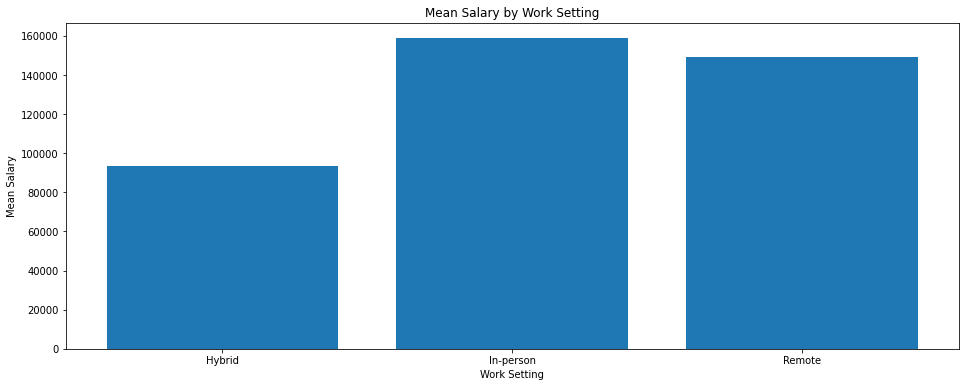

In [71]:
mean_salaries = df.groupby('work_setting')['salary_in_usd'].mean()
plt.figure(figsize=(16, 6))
plt.bar(mean_salaries.index, mean_salaries.values)
plt.xlabel('Work Setting')
plt.ylabel('Mean Salary')
plt.title('Mean Salary by Work Setting')
plt.show()

##### Taking a close look to each category/experience level

[category]
- similar spread of variations for `Data Science and Research`, `ML and AI` and `Data Engineering`
- `BI and Visualisation` and `Leadership and Management ` seem to have the biggest spread of variations 
- `Cloud and Database` definitelyhave too few data to come up any meaningful result

[experience level]
- `Mid-level` positons seem to have the biggest spread of variations 
- `Entry-level`, `Mid-level`, and `Senior` have an obvious skewness

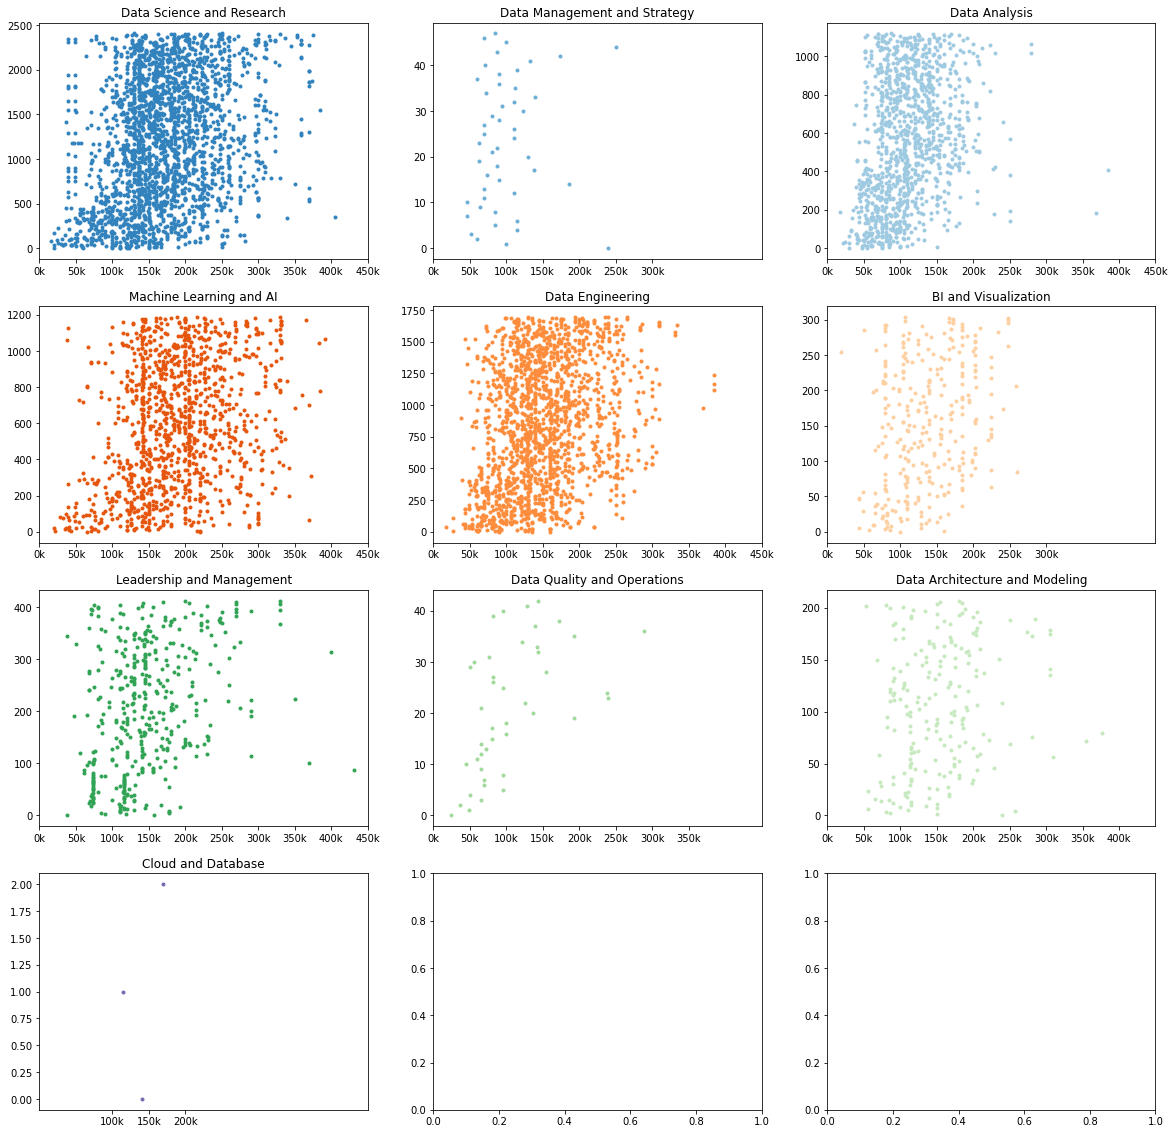

In [72]:
# code inherited from lecture notebook and modified
# create a grid of subplots - scatter
rows = 4
cols = 3
fig, ax = plt.subplots(rows, cols, figsize=(20,20))

# iterates through each label in the labels list, and i is the index of the current label
# create plots for each label
for i, category in enumerate(categorys):
    # extracts the tempo from the df where the "label" column matches the current label
    c_salary = df[df["job_category"]==category]["salary_in_usd"].values 
    
    col = i%cols                                    # calculates the column index for the current subplot using the modulo operator to ensure it wraps around when reaching the specified number of columns
    row = int(np.floor(i/cols))                     # calculates the row index for the current subplot using floor division
    axis = ax[row, col]                             # retrieves the current subplot from the array of subplots

    # plotting data in each subplot
    # x-coordinates from tempos, y-coordinates generated using np.arange(len(tempos)) - return evenly spaced values within a given interval
    axis.plot(c_salary, np.arange(len(c_salary)) , "o", color=colors_list[i], ms = 3)

    # re-arrange ticks and labels so it fits the data size
    axis.xaxis.set_major_locator(MultipleLocator(50000))
    ticks = axis.get_xticks()
    axis.set_xticks(ticks)    
    axis.set_xticklabels([f"{int(tick/1000):,}k" for tick in ticks])

    axis.set_title(category)

    # set the same limits/bounds on the x axis so all graphs are comparable
    axis.set_xlim((0, 450000))

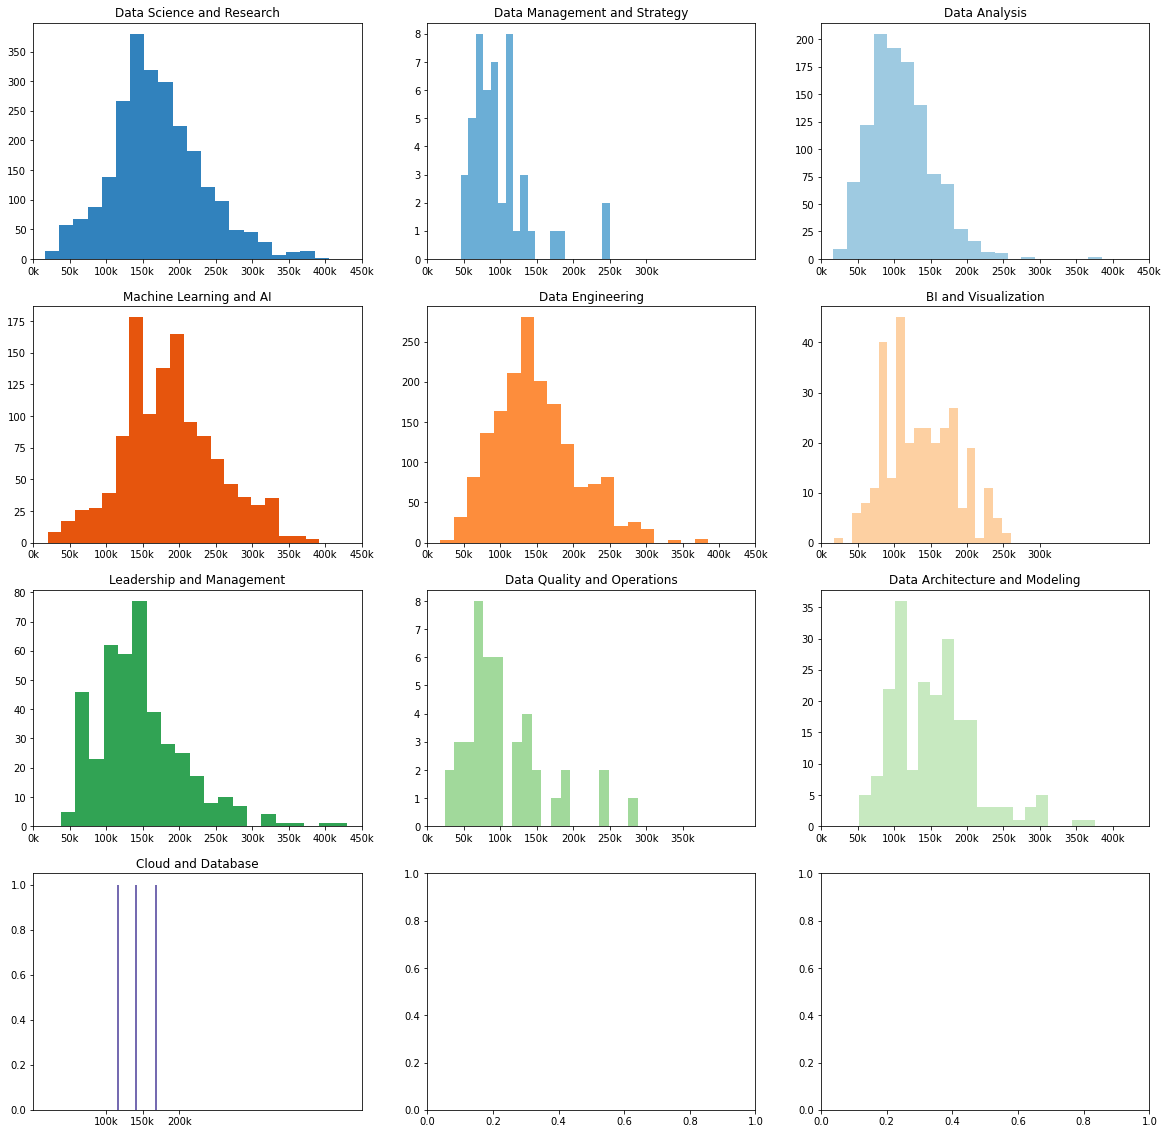

In [73]:
# create a grid of subplots - hist
rows = 4
cols = 3
fig, ax = plt.subplots(rows, cols, figsize=(20,20))
colors = colormaps['tab20c']

for i, category in enumerate(categorys):
    c_salary = df[df["job_category"]==category]["salary_in_usd"].values

    col = i%cols
    row = int(np.floor(i/cols))
    axis = ax[row,col]

    number_of_bins = 20
    h = axis.hist(c_salary, bins=number_of_bins, color=colors_list[i])
    axis.set_title(category)

    # re-arrange ticks and labels so it fits the data size
    axis.xaxis.set_major_locator(MultipleLocator(50000))
    ticks = axis.get_xticks()
    axis.set_xticks(ticks)    
    axis.set_xticklabels([f"{int(tick/1000):,}k" for tick in ticks])

    # set the bounds on the x axis so all graphs are comparable
    axis.set_xlim((0,450000))

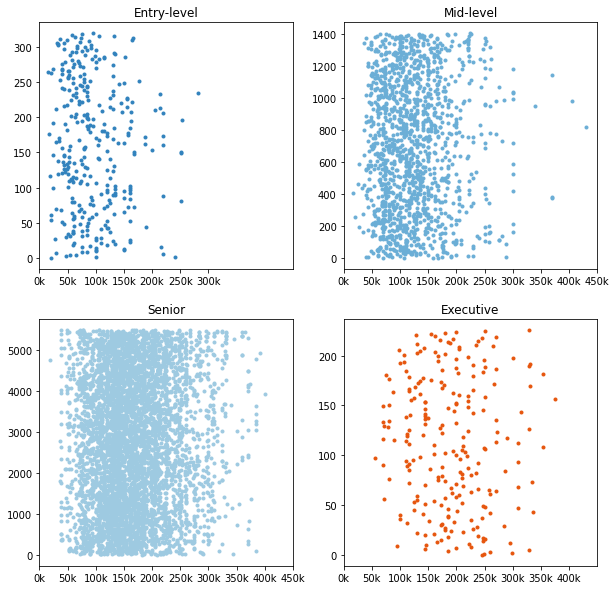

In [74]:
# create a grid of subplots - scatter
rows = 2
cols = 2
fig, ax = plt.subplots(rows, cols, figsize=(10,10))

# iterates through each label in the labels list, and i is the index of the current label
# create plots for each label
for i, level in enumerate(experience_levels):
    # extracts the tempo from the DataFrame df where the "label" column matches the current label
    e_salary = df[df["experience_level"]==level]["salary_in_usd"].values 
    
    col = i%cols                                    # calculates the column index for the current subplot using the modulo operator to ensure it wraps around when reaching the specified number of columns
    row = int(np.floor(i/cols))                     # calculates the row index for the current subplot using floor division
    axis = ax[row, col]                             # retrieves the current subplot from the array of subplots

    # plotting data in each subplot
    # x-coordinates from tempos, y-coordinates generated using np.arange(len(tempos)) - return evenly spaced values within a given interval
    axis.plot(e_salary, np.arange(len(e_salary)) , "o", color=colors_list[i], ms = 3)

    # re-arrange ticks and labels so it fits the data size
    axis.xaxis.set_major_locator(MultipleLocator(50000))
    ticks = axis.get_xticks()
    axis.set_xticks(ticks)    
    axis.set_xticklabels([f"{int(tick/1000):,}k" for tick in ticks])

    axis.set_title(level)

    # set the same limits/bounds on the x axis so all graphs are comparable
    axis.set_xlim((0, 450000))

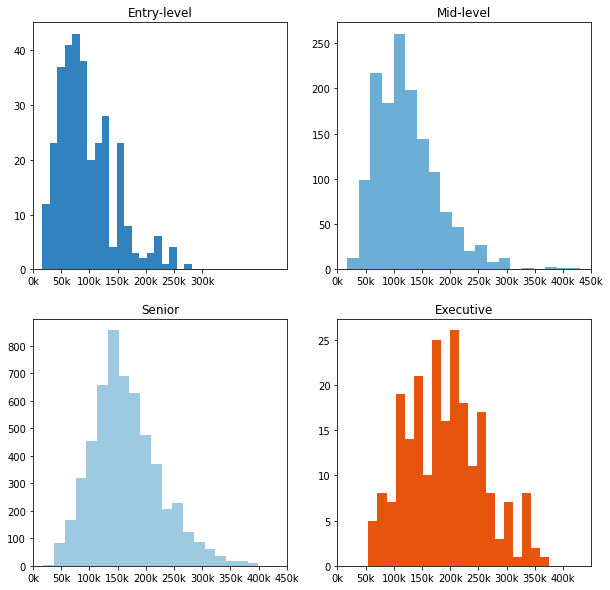

In [75]:
# create a grid of subplots - hist
rows = 2
cols = 2
fig, ax = plt.subplots(rows, cols, figsize=(10,10))
colors = colormaps['tab20c']

for i, level in enumerate(experience_levels):
    e_salary = df[df["experience_level"]==level]["salary_in_usd"].values

    col = i%cols
    row = int(np.floor(i/cols))
    axis = ax[row,col]

    number_of_bins = 20
    h = axis.hist(e_salary, bins=number_of_bins, color=colors_list[i])
    axis.set_title(level)

    # re-arrange ticks and labels so it fits the data size
    axis.xaxis.set_major_locator(MultipleLocator(50000))
    ticks = axis.get_xticks()
    axis.set_xticks(ticks)    
    axis.set_xticklabels([f"{int(tick/1000):,}k" for tick in ticks])

    # set the bounds on the x axis so all graphs are comparable
    axis.set_xlim((0,450000))

### Further exploration - animated chart

With more data (e.g., time data across different years), we can also try to create animated plots to dynamically show trends over time or add more interactive functions to combine multiple charts into one holistic, animated visualisation.

please see another notebook `week-3-4-animated-chart-test` for some test result - based on [Housing in London](https://www.kaggle.com/datasets/justinas/housing-in-london) Dataset by Justinas Cirtautas on Kaggle






### Code References

[1] https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html

[2] https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nlargest.html

[3] https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html

[4] https://seaborn.pydata.org/examples/wide_form_violinplot.html

[5] https://seaborn.pydata.org/generated/seaborn.histplot.html

[6] https://seaborn.pydata.org/generated/seaborn.heatmap.html

[7] https://matplotlib.org/stable/api/ticker_api.html

[8] https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html

[9] https://stackoverflow.com/questions/1823058/how-to-print-a-number-using-commas-as-thousands-separators

[10] https://stackoverflow.com/questions/48799718/pandas-pivot-table-to-stacked-bar-chart

[11] https://www.geeksforgeeks.org/zip-in-python/

[12] https://www.freecodecamp.org/news/lambda-sort-list-in-python/#whatisalambdafunction

[13] https://note.nkmk.me/en/python-pandas-nan-judge-count/

[14] https://medium.com/@jb.ranchana/easy-way-to-create-stacked-bar-graphs-from-dataframe-19cc97c86fe3

*ChatGPT 3.5 was used in this exercise for debugging and searching certain Python codes which have not been taught in class (e.g., .nlagest). 